In [99]:
import networkx as nx
import networkx.algorithms.community as nx_comm

import pandas as pd
from operator import itemgetter
import ast

import matplotlib.pyplot as plt

In [119]:
G = nx.barbell_graph(4, 0)

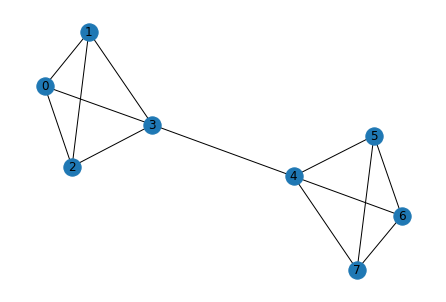

In [84]:
# plt.figure(figsize=(10,10))
nx.draw(G, with_labels=True)

In [141]:
nx_comm.modularity(G, [{0, 1, 2,3 ,4, 5,6,7}])

0.0

In [148]:
def modularity(G, communities, weight="weight", resolution=1):


    directed = G.is_directed()
    if directed:
        out_degree = dict(G.out_degree(weight=weight))
        in_degree = dict(G.in_degree(weight=weight))
        m = sum(out_degree.values())
        norm = 1 / m**2
    else:
        out_degree = in_degree = dict(G.degree(weight=weight))
        # print('out_degree',out_degree)
        deg_sum = sum(out_degree.values())
        print('deg_sum',deg_sum)
        m = deg_sum / 2
        print('m',m)
        norm = 1 / deg_sum**2
        print('norm',norm)
        print("================================================================")

    def community_contribution(community):
        # print(community)
        comm = set(community)
        L_c = sum(wt for u, v, wt in G.edges(comm, data=weight, default=1) if v in comm)
        print('L_c',L_c)
        out_degree_sum = sum(out_degree[u] for u in comm)
        print('out_degree_sum',out_degree_sum)
        in_degree_sum = sum(in_degree[u] for u in comm) if directed else out_degree_sum
        print(in_degree_sum)
        print(L_c,'/',m,'-',out_degree_sum,'*',out_degree_sum,'*',norm, '=', L_c / m - out_degree_sum * in_degree_sum * norm)
        print("================================================================")
        return L_c / m - out_degree_sum * in_degree_sum * norm
    return sum(map(community_contribution, communities))

In [150]:
modularity(G, [{0, 1, 2},{3 ,4, 5,6,7}])

deg_sum 26
m 13.0
norm 0.0014792899408284023
L_c 3
out_degree_sum 9
9
3 / 13.0 - 9 * 9 * 0.0014792899408284023 = 0.11094674556213019
L_c 7
out_degree_sum 17
17
7 / 13.0 - 17 * 17 * 0.0014792899408284023 = 0.11094674556213019


0.22189349112426038

# Hohohihe

In [100]:
df = pd.read_csv("mixed.csv", index_col = [0])

In [101]:
in_reply_to_user_df = df[df['in_reply_to_user_id'].notna()]
in_reply_to_user_df = in_reply_to_user_df.merge(df, left_on='in_reply_to_user_id', right_on='author_id')
in_reply_to_user_df = in_reply_to_user_df.rename(columns={"username_x": "target","username_y": "source"})
in_reply_to_user_df = in_reply_to_user_df[["source", "target"]]
in_reply_to_user_df = in_reply_to_user_df.drop_duplicates(keep= 'first', ignore_index=True)

In [102]:
mentions = []
for i in range(len(df)):
  if isinstance((df["entities"][i]), str):
    if "mentions" in ast.literal_eval(df["entities"][i]).keys():
      mention = {
          "id": df["id"][i],
          "mention_username": ast.literal_eval(df["entities"][i]).get("mentions")[0].get("username")
        }
      mentions.append(mention)

mentions_df = pd.DataFrame(mentions)
mentions_df.head()

,id,mention_username
0,1531407533864529921,GairahUmmi
1,1531407520899923968,GairahUmmi
2,1531407506949681153,GairahUmmi
3,1531407515161743360,barang2gemas
4,1531407478147076096,dinaaghnias


In [103]:
tweets_mention_df = mentions_df.merge(df, left_on='id', right_on='id')
tweets_mention_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6730 entries, 0 to 6729
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   6730 non-null   int64  
 1   mention_username     6730 non-null   object 
 2   author_id            6730 non-null   int64  
 3   created_at           6730 non-null   object 
 4   entities             6730 non-null   object 
 5   in_reply_to_user_id  2409 non-null   float64
 6   text                 6730 non-null   object 
 7   name                 6730 non-null   object 
 8   username             6730 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 525.8+ KB


In [104]:
user_mentions_df = tweets_mention_df.rename(columns={"username": "source", "mention_username": "target"})
user_mentions_df = user_mentions_df[["source", "target"]]
user_mentions_df = user_mentions_df.drop_duplicates(keep= 'first', ignore_index=True)
user_mentions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6330 entries, 0 to 6329
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   source  6330 non-null   object
 1   target  6330 non-null   object
dtypes: object(2)
memory usage: 99.0+ KB


In [105]:
final_df = pd.concat([in_reply_to_user_df, user_mentions_df], ignore_index=True)
final_df = final_df.drop_duplicates(keep= 'first', ignore_index=True)
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6899 entries, 0 to 6898
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   source  6899 non-null   object
 1   target  6899 non-null   object
dtypes: object(2)
memory usage: 107.9+ KB


In [133]:
GG = nx.Graph()

In [134]:
GG = nx.from_pandas_edgelist(final_df, 'source', 'target')

In [147]:
coms = []
for component in nx.connected_components(GG):
    coms.append(component)
print(modularity(GG, coms))
print(nx_comm.modularity(GG, coms))
# sorted_comps = sorted(coms, key=len, reverse=True)

deg_sum 12702
m 6351.0
norm 6.198060101398776e-09
L_c 3
out_degree_sum 6
6
3 / 6351.0 - 6 * 6 * 6.198060101398776e-09
L_c 2
out_degree_sum 4
4
2 / 6351.0 - 4 * 4 * 6.198060101398776e-09
L_c 3167
out_degree_sum 6334
6334
3167 / 6351.0 - 6334 * 6334 * 6.198060101398776e-09
L_c 1
out_degree_sum 2
2
1 / 6351.0 - 2 * 2 * 6.198060101398776e-09
L_c 117
out_degree_sum 234
234
117 / 6351.0 - 234 * 234 * 6.198060101398776e-09
L_c 1
out_degree_sum 2
2
1 / 6351.0 - 2 * 2 * 6.198060101398776e-09
L_c 1
out_degree_sum 2
2
1 / 6351.0 - 2 * 2 * 6.198060101398776e-09
L_c 1
out_degree_sum 2
2
1 / 6351.0 - 2 * 2 * 6.198060101398776e-09
L_c 1
out_degree_sum 2
2
1 / 6351.0 - 2 * 2 * 6.198060101398776e-09
L_c 3
out_degree_sum 6
6
3 / 6351.0 - 6 * 6 * 6.198060101398776e-09
L_c 2
out_degree_sum 4
4
2 / 6351.0 - 4 * 4 * 6.198060101398776e-09
L_c 1
out_degree_sum 2
2
1 / 6351.0 - 2 * 2 * 6.198060101398776e-09
L_c 1
out_degree_sum 2
2
1 / 6351.0 - 2 * 2 * 6.198060101398776e-09
L_c 1
out_degree_sum 2
2
1 / 6351.0 